In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline


In [4]:
raw_data = pd.read_csv('breast_cancer_data.csv',
                      index_col = 'id')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [5]:
raw_data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   
...                       ...            ...  ...            ...   
926424                0.13890         0.1726  ...          26.40   
926682                0.09791         0.1752  ...          38.25   
926954                0.05302         0.1590  ...          34.12   
927241                0.15200         0.2397  ...          39.42   
92751                 0.00000         0.1587  ...          30.37   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0           0.16220            0.66560   
842517             158.80      1956.0           0.12380            0.18660   
84300903           152.50      1709.0           0.14440            0.42450   
84348301            98.87       567.7           0.20980            0.86630   
84358402           152.20      1575.0           0.13740            0.20500   
...                   ...         ...               ...                ...   
926424             166.10      2027.0           0.14100            0.21130   
926682             155.00      1731.0           0.11660            0.19220   
926954             126.70      1124.0           0.11390            0.30940   
927241             184.60      1821.0           0.16500            0.86810   
92751               59.16       268.6           0.08996            0.06444   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504       

In [6]:
# shape

print(raw_data.shape)

(569, 32)


In [170]:
raw_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# All values are null. We'll drop them.
raw_data.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [8]:
raw_data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

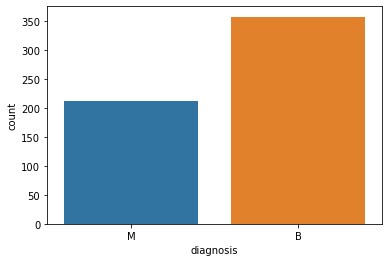

In [9]:
sns.countplot(raw_data['diagnosis'])

In [10]:
raw_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
raw_data['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [28]:
# Building the blr model

# import necessary packages
import imblearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

target_col = 'diagnosis'
feature_cols  = [c for c in raw_data.columns if c != target_col]

X = raw_data[feature_cols]
y = raw_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [29]:
# calculate the predicted labels and predicted probabilities on the test set
# predict test class:

y_pred = model.predict(X_test)

# predict_proba - Probability estimates
y_proba_predic = model.predict_proba(X_test)

In [30]:
# create the confusion matrix for your classifier's performance on the test set.
con_mat = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

In [15]:
# Let's say again that we are predicting cancer based on some kind of detection measure, as before.
confusion = pd.DataFrame(con_mat, index=['predicted_cancer','predicted_healthy'],
                         columns=['is_cancer', 'is_healthy'])

confusion

is_cancer  is_healthy
predicted_cancer          52           3
predicted_healthy          4          84

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84  4]
 [ 3 52]]


In [22]:
print('Model accuracy is:', metrics.accuracy_score(y_test, y_pred))


Test accuracy is: 0.951048951048951


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.95      0.96        88
           M       0.93      0.95      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [31]:
# Confusion matrix

con_mat = confusion_matrix(y_test, y_pred, labels = ['M','B'] )

In [36]:
confusion = pd.DataFrame(con_mat, index = ['Predict_Malignant', 'Predict_Begnin'],
                            columns= ['is_cancer','is_healthy'])
confusion

is_cancer  is_healthy
Predict_Malignant         52           3
Predict_Begnin             4          84

In [37]:
# ACCURACY

print('Model accuracy is:', metrics.accuracy_score(y_test, y_pred))

Model accuracy is: 0.951048951048951


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.95      0.96        88
           M       0.93      0.95      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

